In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv(r"C:\Users\13708\OneDrive\桌面\泰坦尼克号数据\train.csv")

In [3]:
data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,0.0,0
1,1,0,38.0,1,0,71.2833,1.0,1
2,3,0,26.0,0,0,7.9250,0.0,1
3,1,0,35.0,1,0,53.1000,0.0,1
4,3,1,35.0,0,0,8.0500,0.0,0
5,3,1,NaN,0,0,8.4583,2.0,0
6,1,1,54.0,0,0,51.8625,0.0,0
7,3,1,2.0,3,1,21.0750,0.0,0
8,3,0,27.0,0,2,11.1333,0.0,1
9,2,0,14.0,1,0,30.0708,1.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    float64
 7   Survived  891 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [5]:
data.drop(["Name","Ticket","Cabin","PassengerId"],axis=1,inplace=True)

KeyError: "['Name', 'Ticket', 'Cabin', 'PassengerId'] not found in axis"

In [ ]:
data["Age"]=data["Age"].fillna(data["Age"].mean())

In [ ]:
data=data.dropna(axis=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  889 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
labels1 = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels1.index(x))

In [ ]:
data["Sex"] = data["Sex"].replace(["female","male"],[0,1])

C:\Users\13708\AppData\Local\Temp\ipykernel_11576\585078155.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Sex"] = data["Sex"].replace(["female","male"],[0,1])


In [ ]:
x=data.iloc[:,data.columns != "Survived"]

In [ ]:
y=pd.DataFrame(data["Survived"])

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,0
1,1,0,38.000000,1,0,71.2833,1
2,3,0,26.000000,0,0,7.9250,0
3,1,0,35.000000,1,0,53.1000,0
4,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,0
887,1,0,19.000000,0,0,30.0000,0
888,3,0,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3,min_samples_split=12,random_state=42)

In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=12,
                       random_state=42)

In [ ]:
clf.score(x_train,y_train)

0.8311897106109325

In [ ]:
clf.score(x_test,y_test)

0.8239700374531835

In [ ]:
score1 = cross_val_score(clf,x,y,cv=10).mean()
score1

0.8166624106230849

以下为学习曲线的代码示例

In [ ]:
tr=[]
te=[]
for i in range(10):
    clf1 = DecisionTreeClassifier(criterion="entropy",max_depth=i+1,random_state=42)
    clf1 = clf1.fit(x_train,y_train)
    score_tr = clf1.score(x_train,y_train)
    score_te = clf1.score(x_test,y_test)
    tr.append(score_tr)
    te.append(score_te)
print(max(te))

0.8239700374531835


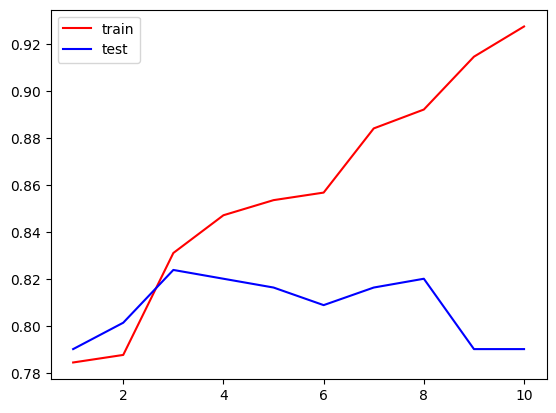

In [ ]:
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.legend()
plt.show()

上图可以看出，深度超过3的时候开始出现过拟合的问题

In [ ]:
clf2 = DecisionTreeClassifier(random_state=42)

In [ ]:
parameters = {
    "criterion": ["entropy"],  # 将字符串包装在列表中
    "max_depth": [9],
    "min_samples_leaf": [1],
    "min_samples_split": list(range(2, 50, 5))
} #这是python中创建list的方式

gs = GridSearchCV(clf2, parameters, cv=10) #创建网格搜索的实体
gs = gs.fit(x_train, y_train)

In [ ]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 12}

In [ ]:
gs.best_score_

0.8279569892473118

In [ ]:
test = pd.read_csv(r"C:\Users\13708\OneDrive\桌面\泰坦尼克号数据\test.csv")

In [ ]:
test.drop(["Name","Ticket","Cabin","PassengerId"],axis=1,inplace=True)

In [ ]:
test["Age"]=test["Age"].fillna(test["Age"].mean())

In [ ]:
labels1 = test["Embarked"].unique().tolist()
test["Embarked"] = test["Embarked"].apply(lambda x: labels1.index(x))

In [ ]:
test["Sex"] = test["Sex"].replace(["female","male"],[0,1])

C:\Users\13708\AppData\Local\Temp\ipykernel_11576\2284643449.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test["Sex"] = test["Sex"].replace(["female","male"],[0,1])


In [ ]:
test["survive_predict"]=clf.predict(test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Survive


In [ ]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,survive_predict
0,3,1,34.50000,0,0,7.8292,0,0
1,3,0,47.00000,1,0,7.0000,1,1
2,2,1,62.00000,0,0,9.6875,0,0
3,3,1,27.00000,0,0,8.6625,1,0
4,3,0,22.00000,1,1,12.2875,1,1
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,1,0
414,1,0,39.00000,0,0,108.9000,2,1
415,3,1,38.50000,0,0,7.2500,1,0
416,3,1,30.27259,0,0,8.0500,1,0


In [ ]:
test.to_csv(r'C:\Users\13708\OneDrive\桌面\泰坦尼克号数据\predict.csv', index=True)